In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./CreditHealthGATech_rgx_credithealth_gatech_anonymized_final.csv', compression='gzip')
data.head(5)

,vs3_band,product_2,archive,totaltrade,n_30p_dpd_delq,n_60p_dpd_delq,n_90p_dpd_delq,n_writeoff,n_dlq_denominator,bal_30p_dpd_delq,bal_60p_dpd_delq,bal_90p_dpd_delq,bal_writeoff,bal_dlq_denominator,balance,hc,vantagescore3,freq_vantagescore3,lookup_nm
0,d. Prime,Other,202206,14208,55,36,23,0,14186,146815,72979,28741,0,28911552,29041874,61731932,9801193,14208,lender_94
1,d. Prime,Bankcard,202105,15790,218,154,60,0,15787,23325,13584,11383,0,36977385,36978152,78219494,10880147,15790,lender_26
2,d. Prime,Bankcard,202110,9495,97,21,1,0,9482,208644,36537,0,0,43535896,43576110,80011674,6563493,9495,lender_2
3,b. Subprime,Other,202101,1955,45,21,19,0,1953,297704,76185,56964,0,6006676,6006676,9290095,1172527,1955,lender_93
4,b. Subprime,Bankcard,202210,1680,36,24,20,0,1680,102174,80753,78162,0,5098447,5098447,6052177,1010214,1680,lender_21


In [3]:
data.columns

Index(['vs3_band', 'product_2', 'archive', 'totaltrade', 'n_30p_dpd_delq',
       'n_60p_dpd_delq', 'n_90p_dpd_delq', 'n_writeoff', 'n_dlq_denominator',
       'bal_30p_dpd_delq', 'bal_60p_dpd_delq', 'bal_90p_dpd_delq',
       'bal_writeoff', 'bal_dlq_denominator', 'balance', 'hc', 'vantagescore3',
       'freq_vantagescore3', 'lookup_nm'],
      dtype='object')

### Group data by product, band

In [ ]:
grp_df = data.groupby(['product_2', 'vs3_band'])
groups_dict = dict(list(grp_df))
groups_dict.keys()

### Group by Products and Dates
Sum the band and lenders
>> product_results: pd.DataFrame()

In [4]:
product_grp = data.groupby(['product_2', 'archive'])
product_archive_dict = dict(list(product_grp))

In [37]:
grouped_sum = product_grp[['n_30p_dpd_delq', 'bal_30p_dpd_delq', 'n_60p_dpd_delq', 'bal_60p_dpd_delq', 'n_90p_dpd_delq', 'bal_90p_dpd_delq', 'balance', 'n_dlq_denominator', 'bal_dlq_denominator', 'n_writeoff', 'bal_writeoff', 'totaltrade']].sum()

In [38]:
result_df = grouped_sum.reset_index()
result_df.tail(5)

,product_2,archive,n_30p_dpd_delq,bal_30p_dpd_delq,n_60p_dpd_delq,bal_60p_dpd_delq,n_90p_dpd_delq,bal_90p_dpd_delq,balance,n_dlq_denominator,bal_dlq_denominator,n_writeoff,bal_writeoff,totaltrade
605,Student Loan,202303,826,14903411,568,9189651,439,6076528,2254540319,55461,2253629076,40,1173703,55529
606,Student Loan,202304,783,13977700,481,6517271,367,4267781,2229372210,50103,2115507924,46,1241980,55197
607,Student Loan,202305,896,14249536,567,8021635,447,4734063,2204529509,54676,2204353761,49,1627373,54704
608,Student Loan,202306,941,17237438,563,8350295,441,5270822,2180514022,54323,2180097948,42,1119885,54386
609,Student Loan,202307,933,16668462,596,9252375,451,5682560,2159180789,53970,2158806127,42,940789,54003


In [7]:
# Make the balance in millions
result_df['adj_balance'] = result_df['balance']/1000000

In [8]:
# 10 items in total
product_list = ['Auto Lease',
'Auto Loan',
 'Bankcard',
 'Home Equity Installment',
 'Home Equity Line of Credit',
 'Mortgage',
 'Other',
 'Personal Loan - Revolving',
 'Personal Loan - Unsecured',
 'Student Loan']

In [9]:
distinct_val = set(list(result_df['product_2']))
distinct_val

{'Auto Lease',
 'Auto Loan',
 'Bankcard',
 'Home Equity Installment',
 'Home Equity Line of Credit',
 'Mortgage',
 'Other',
 'Personal Loan - Revolving',
 'Personal Loan - Unsecured',
 'Student Loan'}

In [10]:
# plt.plot(auto['archive'], auto['adj_balance'])

# plt.xlabel('Date')
# plt.ylabel('Balance (in $Millions)')
# plt.title('Auto Lease Total Balance')

# plt.show()

##### Total Balance for each product

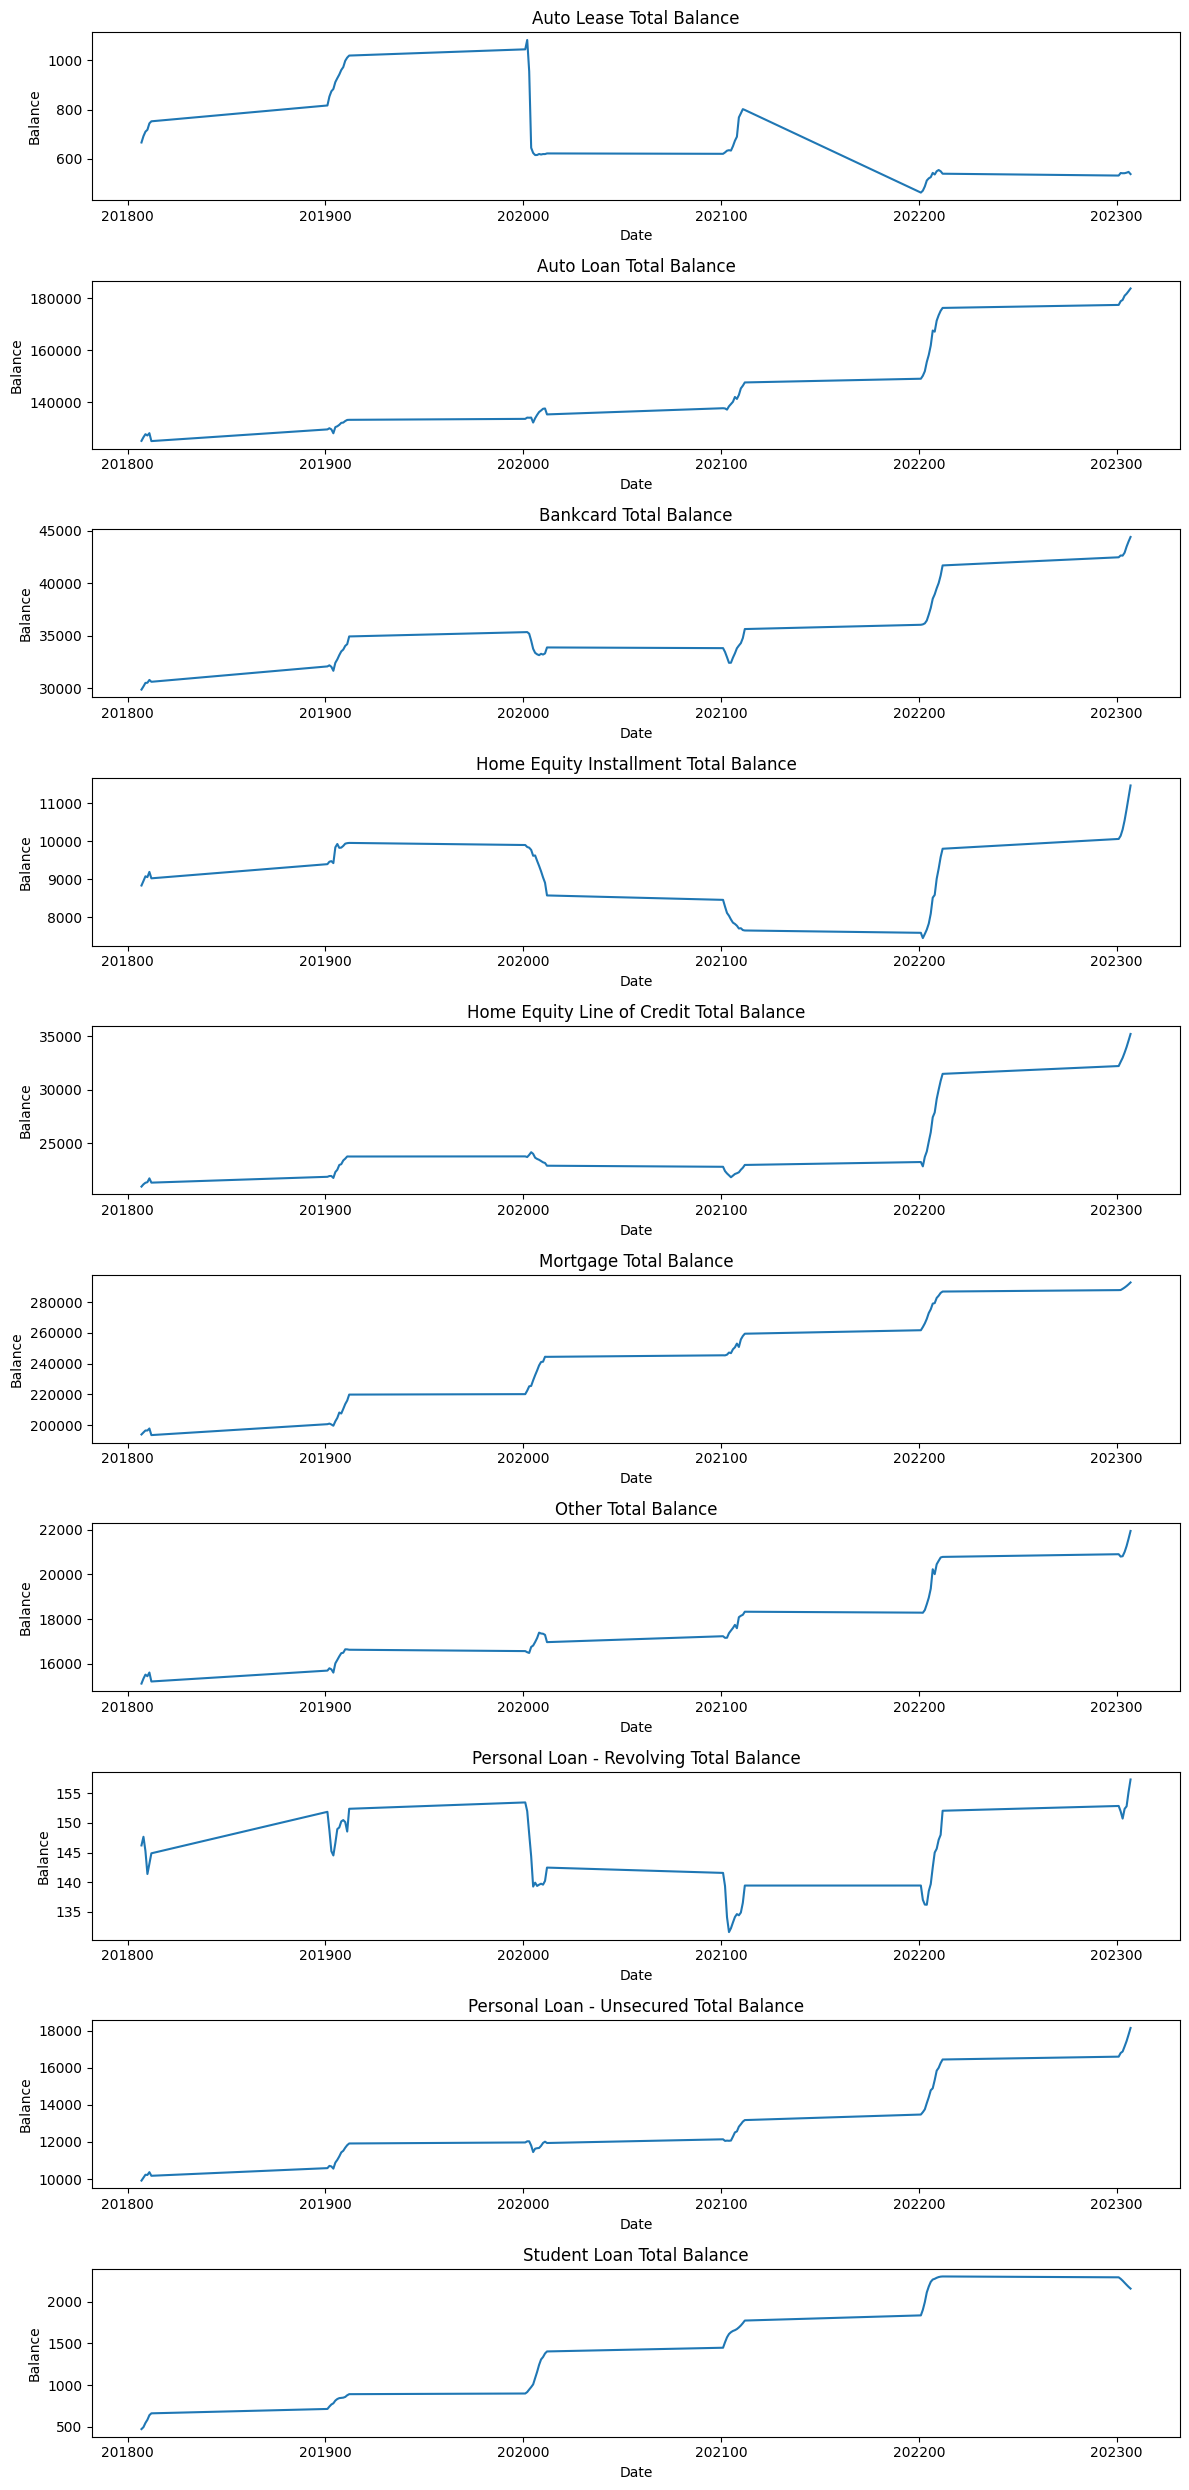

In [11]:
fig, axs = plt.subplots(len(product_list), 1, figsize=(12, 25), gridspec_kw={'height_ratios': [10000]*10})

for i, product in enumerate(product_list):
    ax = axs[i]  # Get the current subplot
    
    df = result_df[result_df['product_2'] == product]
    ax.plot(df['archive'], df['adj_balance'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Balance')
    ax.set_title(product + ' Total Balance')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Group by Products, Dates and Band
>> prod_band_results: pd.DataFrame()

In [12]:
product_band_grp = data.groupby(['product_2', 'archive', 'vs3_band'])
product_band_dict = dict(list(product_band_grp))

In [13]:
grouped2_sum = product_band_grp[['n_30p_dpd_delq', 'bal_30p_dpd_delq', 'n_60p_dpd_delq', 'bal_60p_dpd_delq', 'n_90p_dpd_delq', 'bal_90p_dpd_delq', 'balance']].sum()

In [25]:
result_df2 = grouped2_sum.reset_index()
result_df2.head(10)

,product_2,archive,vs3_band,n_30p_dpd_delq,bal_30p_dpd_delq,n_60p_dpd_delq,bal_60p_dpd_delq,n_90p_dpd_delq,bal_90p_dpd_delq,balance
0,Auto Lease,201807,a. Deep subprime,109,1643114,34,567175,24,325672,17749405
1,Auto Lease,201807,b. Subprime,46,695477,11,96851,6,39609,22264427
2,Auto Lease,201807,c. Near-prime,52,446834,9,31820,7,31594,50763432
3,Auto Lease,201807,d. Prime,61,472927,15,47119,9,2817,128307286
4,Auto Lease,201807,e. Super-prime,46,136539,4,558,0,0,446882207
5,Auto Lease,201807,f. no score,4,43692,3,20056,2,17290,797273
6,Auto Lease,201808,a. Deep subprime,118,1941649,38,597790,26,346480,18639687
7,Auto Lease,201808,b. Subprime,53,702929,12,211623,6,71706,22324018
8,Auto Lease,201808,c. Near-prime,65,538263,14,39683,8,31656,51837661
9,Auto Lease,201808,d. Prime,67,747253,10,24899,7,24814,134461104


#### Deliquency Rate

In [15]:
dlq_timeframe = ['30', '60', '90']

In [28]:
# in %
for period in dlq_timeframe:
    # Number of delinquency rate
    result_df[f'n_dlq_{period}rate'] = (result_df[f'n_{period}p_dpd_delq'] / result_df['n_dlq_denominator'])*100

    # Balance of delinquency rate
    result_df[f'bal_dlq_{period}rate'] = (result_df[f'bal_{period}p_dpd_delq'] / result_df['bal_dlq_denominator'])*100

In [39]:
result_df.head(3)

,product_2,archive,n_30p_dpd_delq,bal_30p_dpd_delq,n_60p_dpd_delq,bal_60p_dpd_delq,n_90p_dpd_delq,bal_90p_dpd_delq,balance,n_dlq_denominator,bal_dlq_denominator,n_writeoff,bal_writeoff,totaltrade
0,Auto Lease,201807,318,3438583,76,763579,48,416982,666764030,42298,666507088,49,375265,42345
1,Auto Lease,201808,352,4161557,83,906549,50,482792,692457857,43656,692210831,13,134211,43699
2,Auto Lease,201809,420,4950917,94,785134,56,356582,710559922,44531,710328749,9,172992,44558


##### 30 Delinquency Rate

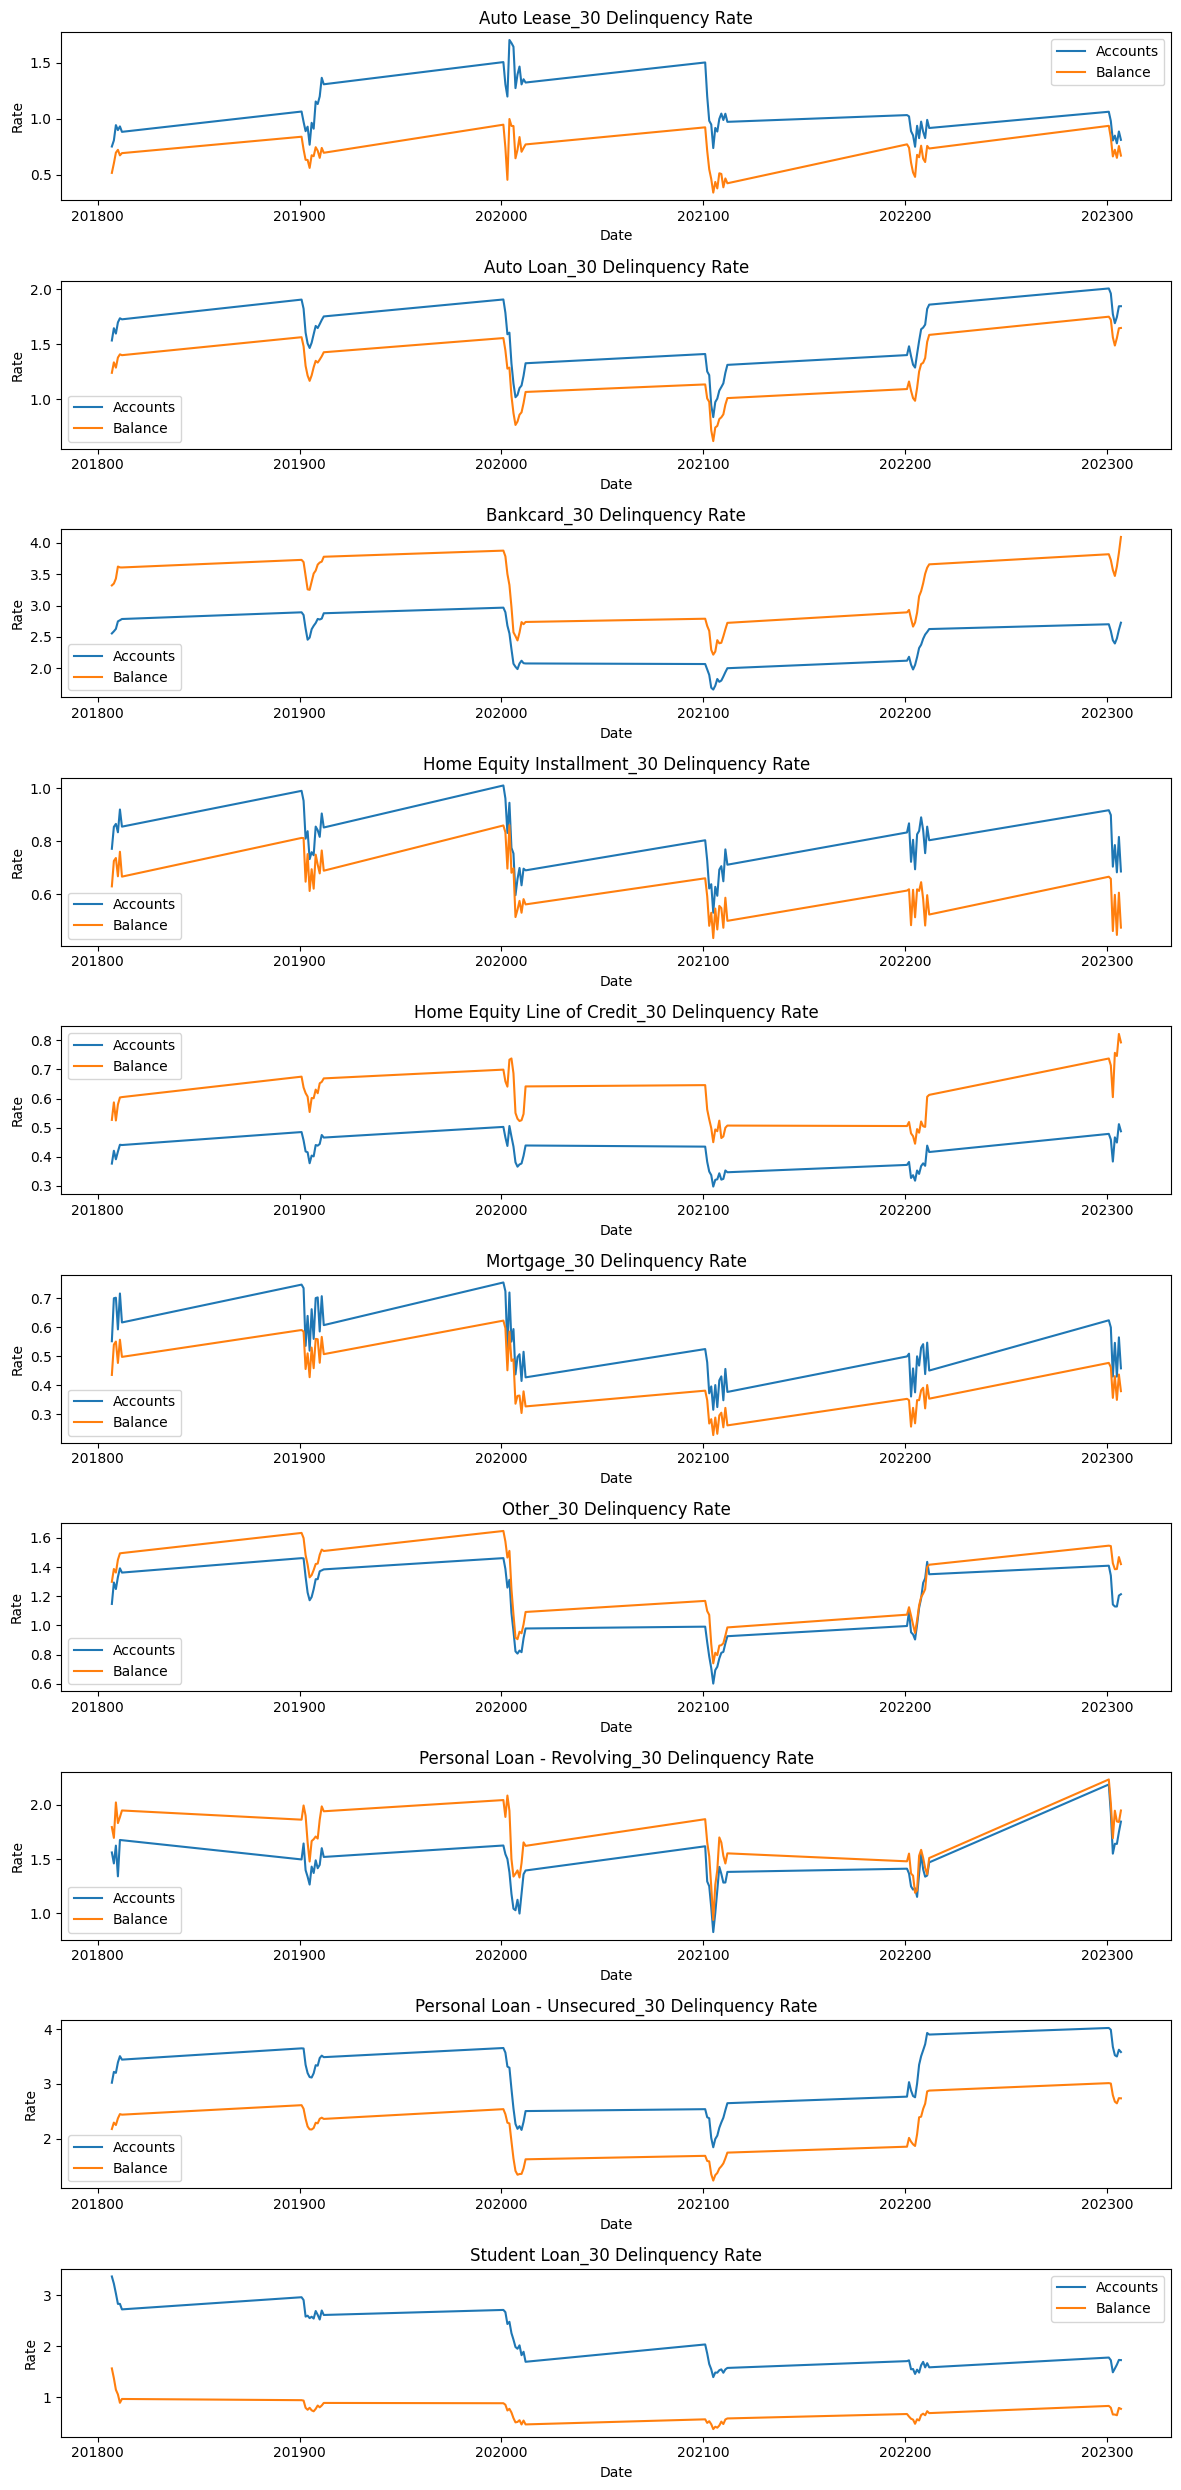

In [32]:
fig, axs = plt.subplots(len(product_list), 1, figsize=(12, 25), gridspec_kw={'height_ratios': [10000]*10})

for i, product in enumerate(product_list):
    ax = axs[i]  # Get the current subplot
    
    df = result_df[result_df['product_2'] == product]
    
    n, = ax.plot(df['archive'], df['n_dlq_30rate'], label='Accounts')
    b, = ax.plot(df['archive'], df['bal_dlq_30rate'], label='Balance')
    
    ax.legend()
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate')
    ax.set_title(product + '_30 Delinquency Rate')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

##### 60 Delinquency Rate

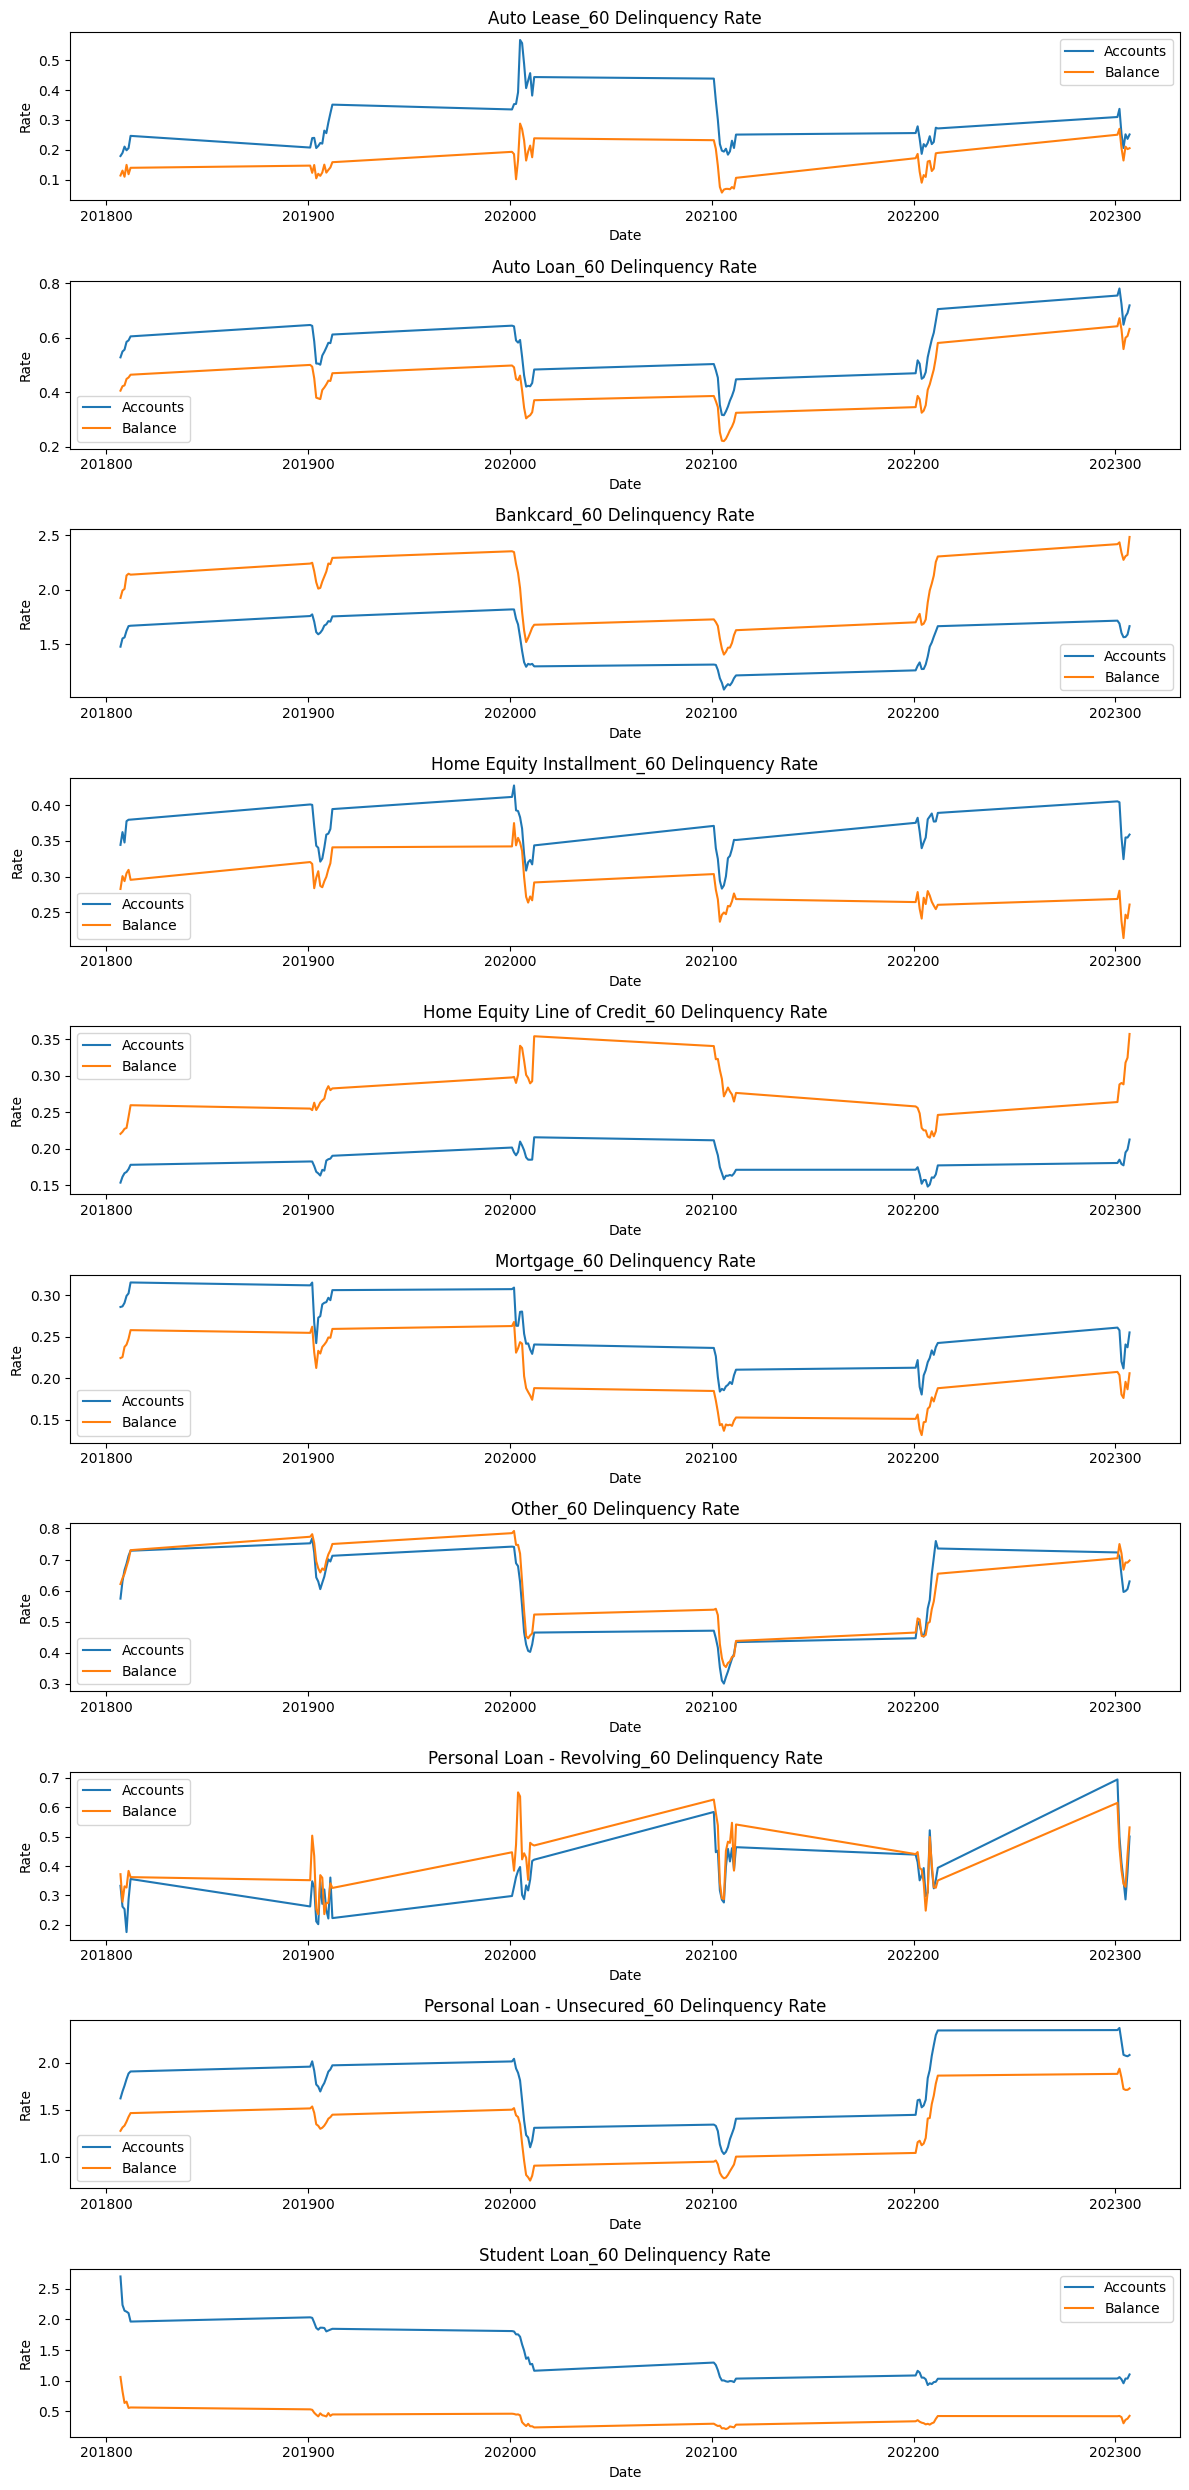

In [33]:
fig, axs = plt.subplots(len(product_list), 1, figsize=(12, 25), gridspec_kw={'height_ratios': [10000]*10})

for i, product in enumerate(product_list):
    ax = axs[i]  # Get the current subplot
    
    df = result_df[result_df['product_2'] == product]
    
    n, = ax.plot(df['archive'], df['n_dlq_60rate'], label='Accounts')
    b, = ax.plot(df['archive'], df['bal_dlq_60rate'], label='Balance')
    
    ax.legend()
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate')
    ax.set_title(product + '_60 Delinquency Rate')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

##### 90 Delinquency Rate

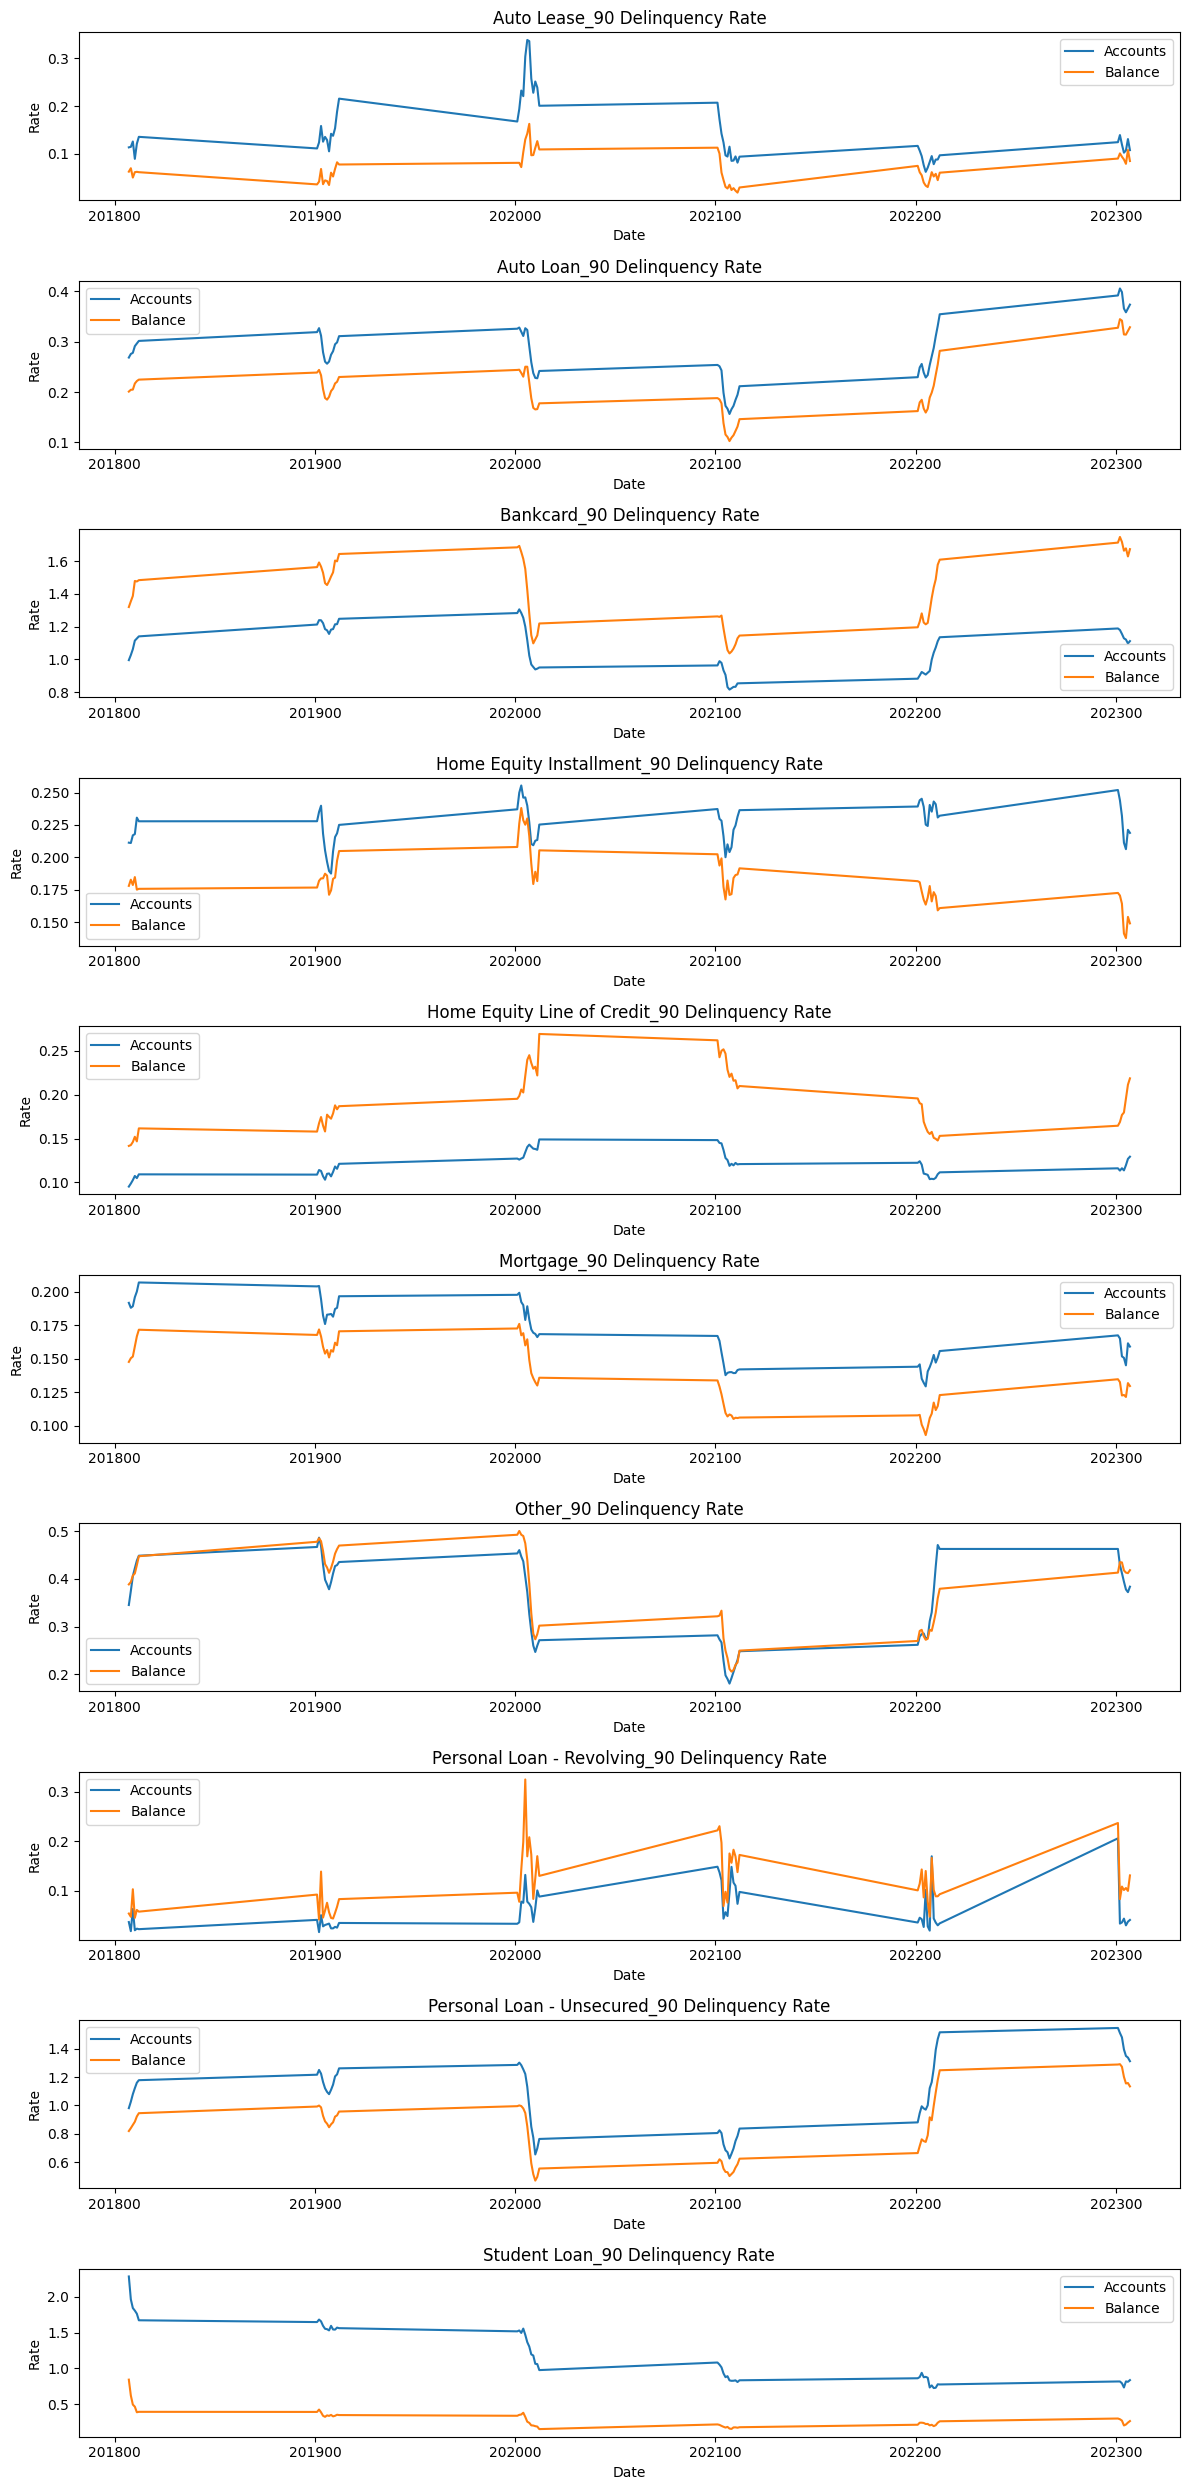

In [34]:
fig, axs = plt.subplots(len(product_list), 1, figsize=(12, 25), gridspec_kw={'height_ratios': [10000]*10})

for i, product in enumerate(product_list):
    ax = axs[i]  # Get the current subplot
    
    df = result_df[result_df['product_2'] == product]
    
    n, = ax.plot(df['archive'], df['n_dlq_90rate'], label='Accounts')
    b, = ax.plot(df['archive'], df['bal_dlq_90rate'], label='Balance')
    
    ax.legend()
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate')
    ax.set_title(product + '_90 Delinquency Rate')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

##### Writeoff Rate

In [40]:
result_df['n_wo_rate'] = (result_df['n_writeoff'] / result_df['totaltrade'])*100
result_df['bal_wo_rate'] = (result_df['bal_writeoff'] / result_df['balance'])*100

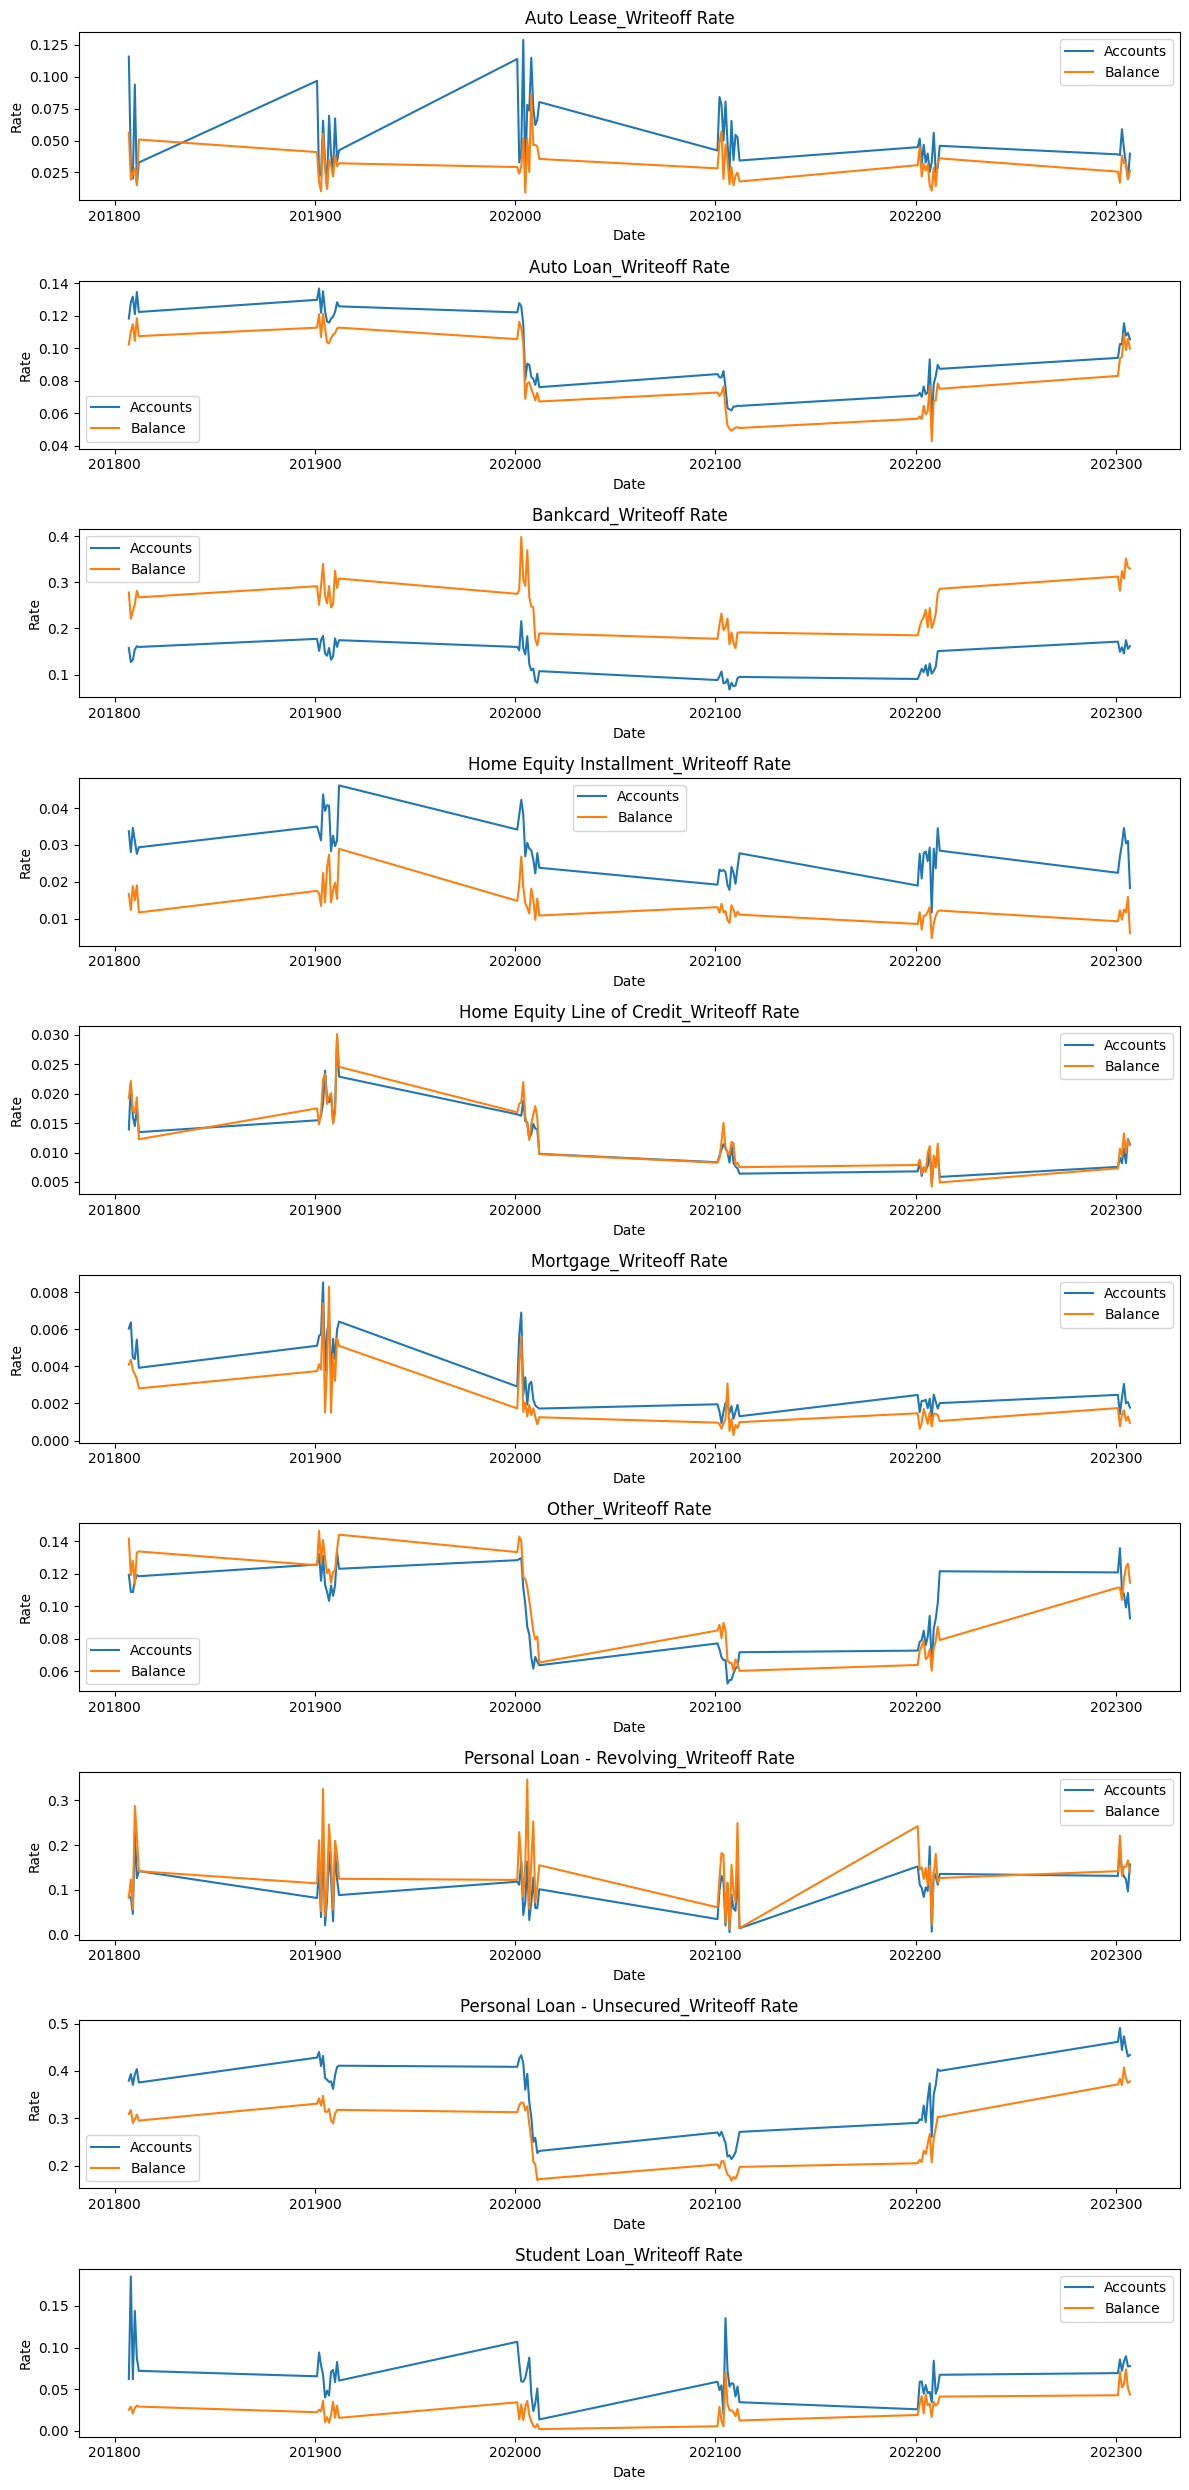

In [41]:
fig, axs = plt.subplots(len(product_list), 1, figsize=(12, 25), gridspec_kw={'height_ratios': [10000]*10})

for i, product in enumerate(product_list):
    ax = axs[i]  # Get the current subplot
    
    df = result_df[result_df['product_2'] == product]
    
    n, = ax.plot(df['archive'], df['n_wo_rate'], label='Accounts')
    b, = ax.plot(df['archive'], df['bal_wo_rate'], label='Balance')
    
    ax.legend()
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate')
    ax.set_title(product + '_Writeoff Rate')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

##### Stacked Bar Chart